## Implementação e Comparação de Mais Modelos:

* Adicionarei Regressão Logística e Support Vector Machine (SVM) ao treinamento.

* Avaliarei e compararei as métricas de todos os modelos (Random Forest, Regressão Logística e SVM).

## Validação Cruzada:

Utilizarei cross_val_score para realizar uma avaliação mais robusta de cada modelo.

## Otimização de Hiperparâmetros:

Utilizarei GridSearchCV para otimizar os hiperparâmetros do Random Forest.

## Balanceamento de Dados:

Utilizarei SMOTE (Synthetic Minority Over-sampling Technique) para balancear as classes, mitigando o impacto da diferença entre a quantidade de amostras malignas e benignas.



c:\Users\Machine\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Machine\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training and evaluating Random Forest...
  Cross-validation accuracy: 0.958 (+/- 0.021)
  Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       102
           1       0.96      0.93      0.95       113

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



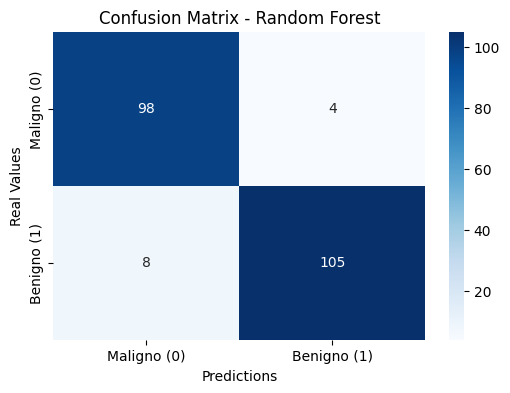

  Best parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
  Classification Report (Optimized Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       102
           1       0.96      0.94      0.95       113

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215



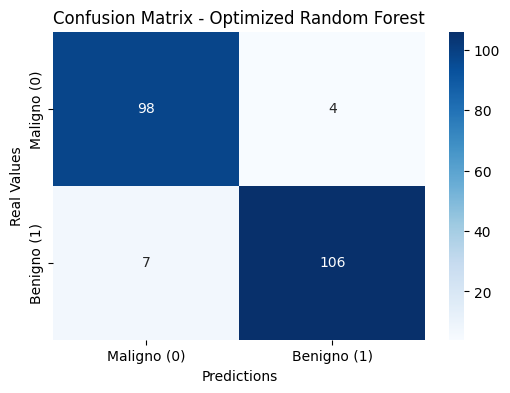

  Optimized Random Forest saved as: optimized_random_forest_model.joblib
Training and evaluating Logistic Regression...
  Cross-validation accuracy: 0.944 (+/- 0.015)
  Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       102
           1       0.92      0.96      0.94       113

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



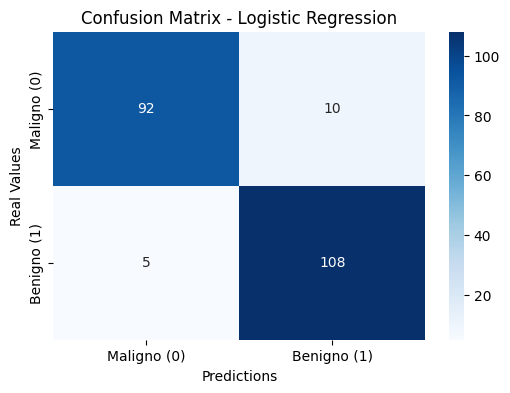

Training and evaluating SVM...
  Cross-validation accuracy: 0.891 (+/- 0.027)
  Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       102
           1       0.89      0.94      0.91       113

    accuracy                           0.91       215
   macro avg       0.91      0.91      0.91       215
weighted avg       0.91      0.91      0.91       215



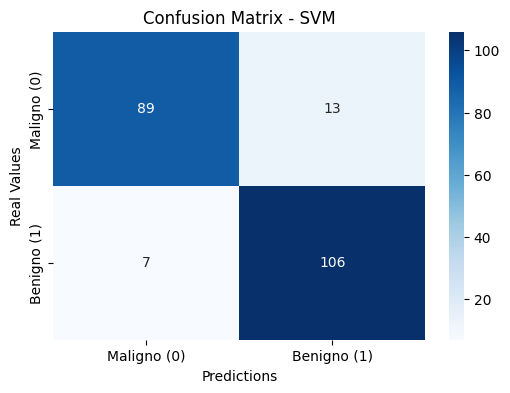

  Original Random Forest saved as: breast_cancer_model.joblib


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from imblearn.over_sampling import SMOTE


# Chamar a base de dados já criada
df = pd.read_csv('df_reduced.csv')


# 8. Balanceamento de Dados (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('alvo', axis=1), df['alvo'])


# Separa os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


# 9. Treinamento, Avaliação e Otimização de Modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'SVM': SVC(random_state=42)
}

for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Cross-validation
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print(f"  Cross-validation accuracy: {np.mean(scores):.3f} (+/- {np.std(scores):.3f})")

    # Model fitting
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print Classification Report
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Maligno (0)', 'Benigno (1)'], yticklabels=['Maligno (0)', 'Benigno (1)'])
    plt.xlabel('Predictions')
    plt.ylabel('Real Values')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    if name == 'Random Forest':
        # Otimização de Hiperparâmetros (Apenas para Random Forest)
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15],
            'min_samples_leaf': [1, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred_best = best_model.predict(X_test)
        print(f"  Best parameters for Random Forest: {grid_search.best_params_}")
        print(f"  Classification Report (Optimized Random Forest):\n{classification_report(y_test, y_pred_best)}")

        # Matriz de confusão
        cm_best = confusion_matrix(y_test, y_pred_best)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=['Maligno (0)', 'Benigno (1)'], yticklabels=['Maligno (0)', 'Benigno (1)'])
        plt.xlabel('Predictions')
        plt.ylabel('Real Values')
        plt.title(f'Confusion Matrix - Optimized {name}')
        plt.show()


        # Save Optimized Model
        filename = f'optimized_{name.lower().replace(" ", "_")}_model.joblib'
        joblib.dump(best_model, filename)
        print(f"  Optimized {name} saved as: {filename}")



# 10. Salvamento do modelo
filename = 'breast_cancer_model.joblib'
joblib.dump(models['Random Forest'], filename)
print(f"  Original Random Forest saved as: {filename}")